In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Importing required packages
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the data set 'Weather_Data.csv' as data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Weather_Data.csv')
data.head()

# The 'Date' column is of no use, so drop the column
data.drop(['Date'], axis = 1, inplace = True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [4]:
# Check the dimension of the data
data.shape # There are 3271 rows and 21 columns

(3271, 21)

In [5]:
# Check the columns of the data
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Check the column type of every column
data.dtypes

,0
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,int64
WindDir9am,object
WindDir3pm,object
WindSpeed9am,int64


In [7]:
# Check for any missing values
data.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [8]:
# For the simplicity of the model, i am considering the numerical columns as input
# The 'Raintomorrow' column will be the output

data_v2 = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                'Temp3pm','RainTomorrow']]

data_v2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes
1,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes
2,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes
3,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes
4,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes


In [9]:
# Convering the values of 'RainTomorrow' column into 0s and 1s
# 0s for No and 1s for Yes

data_v3 = data_v2.replace(['No', 'Yes'], [0,1])
data_v3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,1
1,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,1
2,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,1
3,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,1
4,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,1


In [15]:
# Separating the input features (X) and output feature (y)
X = data_v3.drop(['RainTomorrow'], axis = 1)
y = data_v3['RainTomorrow']

In [17]:
# Splitting the data set into training and test part
# Consider test size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (2616, 16)
Shape of X_test is: (655, 16)
Shape of y_train is: (2616,)
Shape of y_test is: (655,)


In [18]:
# Define the LogisticRegression object
model = LogisticRegression()

In [19]:
# Training the model with X_train and y_train
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predict the model outcomes using X_test
y_pred = model.predict(X_test)

In [21]:
# Determine the predicted probabilities
y_pred_proba = model.predict_proba(X_test)

In [23]:
# Checking the model evaluation scores
model_accuracy = accuracy_score(y_test, y_pred)
model_f1Score = f1_score(y_test, y_pred)
model_logloss = log_loss(y_test, y_pred_proba)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)
model_roc = roc_auc_score(y_test, y_pred)
model_cnfm = confusion_matrix(y_test, y_pred)

In [25]:
# Creating the result in a tabulated format
result = pd.DataFrame({'Accuracy': [model_accuracy], 'F1 Score': [model_f1Score], 'Log Loss': [model_logloss],
                       'Precision': [model_precision], 'Recall':[model_recall], 'Roc Auc Score': [model_roc]})
result

,Accuracy,F1 Score,Log Loss,Precision,Recall,Roc Auc Score
0,0.842748,0.650847,0.359879,0.768,0.564706,0.752456


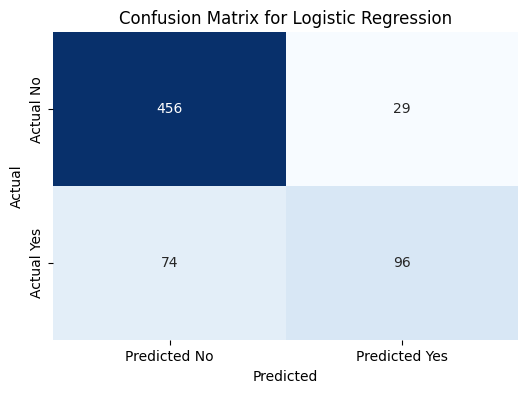

In [27]:
# Visualize the Confusion matrix by using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(model_cnfm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted No', 'Predicted Yes'], yticklabels = ['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()